# 문제 1번

안녕하세요. 물류비 팀입니다 :)

파일 경로(file_path)의 경우, 저희 팀 개인 로컬의 경로로 되어 있어
확인하시는 분 컴퓨터 내 경로를 참조하여 저희가 동봉해둔 시나리오 엑셀로 경로를 바꾸어 시뮬레이션이 가능하십니다.

### 파일 불러오기

In [1]:
import pandas as pd

file_path = '/Users/youjunglee/Desktop/AI물류대회/scenario_basicF2.xlsx'

sheets = pd.read_excel(file_path, sheet_name=None)

for sheet_name, data in sheets.items():
    # 변수를 동적으로 생성하여 저장
    globals()[sheet_name] = data
    print(f"Loaded sheet: {sheet_name}")
    print(data.head())

Loaded sheet: 약어정리
           State  약어
0   Pennsylvania  PA
1     New Jersey  NJ
2        Georgia  GA
3    Connecticut  CT
4  Massachusetts  MA
Loaded sheet: City
   Rank          City         State        City&State  Population  \
0     1      New York      New York      New York, NY     8915633   
1     2   Los Angeles    California   Los Angeles, CA     4125308   
2     3       Chicago      Illinois       Chicago, IL     2858509   
3     4       Houston         Texas       Houston, TX     2351536   
4     5  Philadelphia  Pennsylvania  Philadelphia, PA     1638312   

               Location  Demand  Unnamed: 7 State.1 Unnamed: 9  
0   40.6643°N 73.9385°W  825722         NaN      NY        NaN  
1  34.0194°N 118.4108°W  382066         NaN      CA        NaN  
2   41.8376°N 87.6818°W  264741         NaN      IL        NaN  
3   29.7805°N 95.3863°W  217788         NaN      TX        NaN  
4   40.0094°N 75.1333°W  151732         NaN      PA        NaN  
Loaded sheet: Distance
     Fro

특히 저희는 과도한 매핑 작업을 미연에 방지하기 위해 FROMTO(Q2) 시트에 동적으로 변하지 않는 값들을 미리 정의해두었습니다. 따라서 해당 시트만 사용할 예정입니다.

In [2]:
# 특정 시트 저장
total_table = sheets['FROMTO(Q2)']  # 시트이름을 해당 시트의 실제 이름으로 변경

In [3]:
total_table

,City,From City&State,To City&State,TempD(직각거리),Inbound Unit Rate,TruckUnitRate,WHUnitRate,Demand,평균재고량,거리,Inbound,Warehouse,Delivery,TOTAL
0,New York,"New York, NY","New York, NY",16.000000,4.772727,0.002388,0.635866,825722,68810.166667,16.000000,3.940946e+06,525048.349760,3.155339e+04,4.497548e+06
1,New York,"New York, NY","Los Angeles, CA",5487.540912,4.772727,0.002388,0.635866,382066,31838.833333,5487.540912,1.823497e+06,242942.688701,5.007354e+06,7.073794e+06
2,New York,"New York, NY","Chicago, IL",1617.869376,4.772727,0.002388,0.635866,264741,22061.750000,1617.869376,1.263537e+06,168339.738028,1.022956e+06,2.454832e+06
3,New York,"New York, NY","Houston, TX",3326.558976,4.772727,0.002388,0.635866,217788,18149.000000,3326.558976,1.039443e+06,138483.932846,1.730300e+06,2.908226e+06
4,New York,"New York, NY","Philadelphia, PA",189.617112,4.772727,0.002388,0.635866,151732,12644.333333,189.617112,7.241755e+05,96481.183989,6.871426e+04,8.893709e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11281,Evansville,"Evansville, IN","Sandy Springs, GA",756.360504,5.681818,0.001445,0.384662,9910,825.833333,756.360504,5.630682e+04,3811.998475,1.082950e+04,7.094831e+04
11282,Evansville,"Evansville, IN","Tyler, TX",1354.700160,5.681818,0.001445,0.384662,9863,821.916667,1354.700160,5.603977e+04,3793.919370,1.930447e+04,7.913817e+04
11283,Evansville,"Evansville, IN","Las Cruces, NM",2620.400976,5.681818,0.001445,0.384662,9862,821.833333,2620.400976,5.603409e+04,3793.534708,3.733692e+04,9.716455e+04
11284,Evansville,"Evansville, IN","South Bend, IN",466.145064,5.681818,0.001445,0.384662,9840,820.000000,466.145064,5.590909e+04,3785.072148,6.627076e+03,6.632124e+04


In [4]:
priority = Priority[['WH', 'City&State']].head(10)

In [5]:
priority

,WH,City&State
0,WH1,"Los Angeles, CA"
1,WH2,"Baltimore, MD"
2,WH3,"Chicago, IL"
3,WH4,"Columbus, OH"
4,WH5,"Atlanta, GA"
5,WH6,"Charlotte, NC"
6,WH7,"Houston, TX"
7,WH8,"Denver, CO"
8,WH9,"Portland, OR"
9,WH10,"Memphis, TN"


### 시뮬레이션 동적 할당

priority의 10개 선호 도시를 그대로 시뮬레이션을 할 수도 있고,
원하는 대로 38개의 도시 중 10개를 선호 순서대로 골라 또 다른 경우를 확인할 수도 있습니다. instruction을 print해 두었으니 참고하시면 됩니다.

In [6]:
def update_priority_table(user_input):
    global priority
    
    if user_input == '그대로':
        # 현재 priority_table을 복사하여 priority_table에 저장
        return priority['City&State'].tolist()
    elif user_input == '교체':
        # To City&State의 고유 값 목록 표시
        unique_cities = total_table['From City&State'].unique()
        print("사용 가능한 도시 및 주 목록:")
        for city in unique_cities:
            print(city)

        new_cities = []
        
        # 10개의 도시 입력을 요구
        while len(new_cities) < 10:
            city = input(f"{len(new_cities) + 1}번째 도시를 입력하세요: ")
            if city in unique_cities:
                new_cities.append(city)
            else:
                print(f"{city}는 유효한 도시가 아닙니다. 다시 입력해 주세요.")
        
        # 우선순위 테이블 갱신
        priority['City&State'][:] = new_cities  # 기존 리스트를 새로운 리스트로 교체
        return priority
    else:
        return "잘못된 입력입니다."

# 사용 예시
user_input = input("입력 ('그대로' 또는 '교체'): ")
result = update_priority_table(user_input)
print("현재 우선순위 테이블:", result)

현재 우선순위 테이블: 잘못된 입력입니다.


중간에 잘못된 입력이 들어올 시에, 전체 초기화 대신 해당 순위의 값만 초기화하고 다시 유의한 값을 입력하도록 해 두었습니다.

In [7]:
try:
    user_input = int(input("몇 위까지 확인하기 원하는지 입력하세요: "))
    if user_input < 1:
        raise ValueError("1 이상의 값을 입력해 주세요.")
    elif user_input > len(priority):
        raise ValueError(f"최대 {len(priority)}위까지만 확인할 수 있습니다.")
except ValueError as e:
    print(f"올바른 수를 입력해 주세요. ({e})")
else:
    # 리스트 슬라이싱을 통해 결과 생성
    result = priority['City&State'][:user_input]
    print("선택된 도시 목록:")
    print(result)

선택된 도시 목록:
0    Los Angeles, CA
1      Baltimore, MD
2        Chicago, IL
3       Columbus, OH
4        Atlanta, GA
5      Charlotte, NC
6        Houston, TX
7         Denver, CO
8       Portland, OR
9        Memphis, TN
Name: City&State, dtype: object


창고를 몇 개 설정하고자 하는지를 input으로 넣을 수 있습니다.
시뮬레이션 이외에, 1~10개 창고를 선정했을 때 물류비를 비교하는 목적에서는 아래에 for문을 돌려 비교합니다.

### 필터링을 통한 물류비 산출 과정

이미 Priority는 정해져있기에, 어떤 도시가 어떤 위치 창고를 선택하는지는 크게 상관이 없습니다. 최적화보다는 배당문제로 보았습니다. 예컨대, A가 a 창고를 선택하는 것이 B가 창고를 선택하는 데에 영향을 주지는 않습니다. 문제 2번의 경우 영향을 줍니다.

In [8]:
result

0    Los Angeles, CA
1      Baltimore, MD
2        Chicago, IL
3       Columbus, OH
4        Atlanta, GA
5      Charlotte, NC
6        Houston, TX
7         Denver, CO
8       Portland, OR
9        Memphis, TN
Name: City&State, dtype: object

In [9]:
filtered_table = total_table[total_table['From City&State'].isin(result)]
#297 * n개에 해당하는 곳들만 산출됨. n이 5인 경우, 297*5 = 1485개

In [10]:
# 각 'To City&State'마다 'TOTAL'이 최소인 Row 선택
# 초기화
min_total_rows = []
min_total_rows = filtered_table.loc[filtered_table.groupby('To City&State')['TOTAL'].idxmin()]
min_total_rows
#297개에 대해 하나씩 장소를 선택

,City,From City&State,To City&State,TempD(직각거리),Inbound Unit Rate,TruckUnitRate,WHUnitRate,Demand,평균재고량,거리,Inbound,Warehouse,Delivery,TOTAL
1111,Houston,"Houston, TX","Abilene, TX",716.203728,4.318182,0.001385,0.368757,11763,980.250000,716.203728,50794.772727,4337.685434,11668.669167,66801.127328
2196,Columbus,"Columbus, OH","Akron, OH",258.265368,5.113636,0.001382,0.368017,19241,1603.416667,258.265368,98391.477273,7081.015202,6868.919009,112341.411484
328,Los Angeles,"Los Angeles, CA","Albuquerque, NM",1392.050016,2.500000,0.002049,0.545469,54182,4515.166667,1392.050016,135455.000000,29554.611149,154527.858032,319537.469181
4620,Baltimore,"Baltimore, MD","Alexandria, VA",94.617504,5.681818,0.001793,0.477474,14643,1220.250000,94.617504,83198.863636,6991.646941,2484.721238,92675.231816
4680,Baltimore,"Baltimore, MD","Allentown, PA",239.313096,5.681818,0.001793,0.477474,11582,965.166667,239.313096,65806.818182,5530.100039,4970.798383,76307.716604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,Charlotte,"Charlotte, NC","Wilmington, NC",412.925904,5.227273,0.001400,0.372847,11053,921.083333,412.925904,57777.045455,4121.082580,6391.608135,68289.736169
2462,Charlotte,"Charlotte, NC","Winston–Salem, NC",142.027992,5.227273,0.001400,0.372847,23268,1939.000000,142.027992,121628.181818,8675.413867,4627.973300,134931.568985
4751,Baltimore,"Baltimore, MD","Woodbridge, NJ",366.978600,5.681818,0.001793,0.477474,9805,817.083333,366.978600,55710.227273,4681.629329,6453.041529,66844.898131
2209,Columbus,"Columbus, OH","Worcester, MA",1433.613384,5.113636,0.001382,0.368017,17798,1483.166667,1433.613384,91012.500000,6549.966663,35269.380534,132831.847197


목적도시 297개 도시들에 대해서 주어진 도시들 중에 가장 TOTAL(Inbound, Warehouse, Delivery의 합, 미리 정의됨) 물류비를 적게 산출하는 곳을 데려옵니다. 이때, 현재 열린 창고 중 최선을 선택하는 것이 중요합니다.

In [11]:
a = min_total_rows[['From City&State', 'To City&State']]
print(a)

      From City&State      To City&State
1111      Houston, TX        Abilene, TX
2196     Columbus, OH          Akron, OH
328   Los Angeles, CA    Albuquerque, NM
4620    Baltimore, MD     Alexandria, VA
4680    Baltimore, MD      Allentown, PA
...               ...                ...
2616    Charlotte, NC     Wilmington, NC
2462    Charlotte, NC  Winston–Salem, NC
4751    Baltimore, MD     Woodbridge, NJ
2209     Columbus, OH      Worcester, MA
4567    Baltimore, MD        Yonkers, NY

[297 rows x 2 columns]


In [12]:
min_total_rows['From City&State'].value_counts()

From City&State
Los Angeles, CA    72
Houston, TX        56
Charlotte, NC      36
Portland, OR       35
Chicago, IL        27
Columbus, OH       23
Baltimore, MD      15
Atlanta, GA        13
Denver, CO         11
Memphis, TN         9
Name: count, dtype: int64

각 창고에 할당된 창고와 개수들을 확인할 수 있습니다.

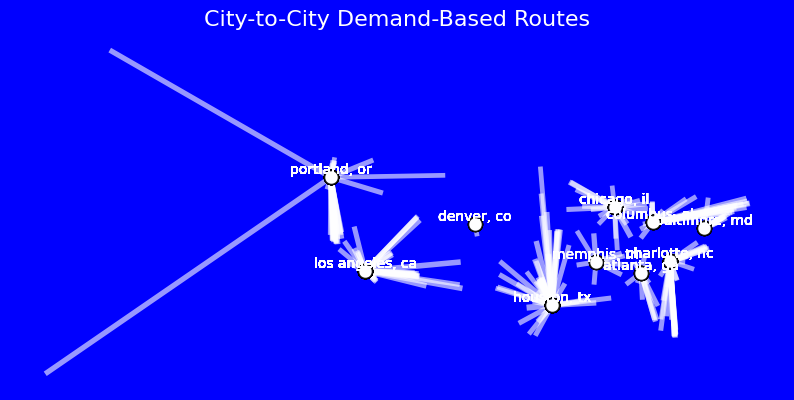

In [13]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np

# Prepare the data
distance_df = Distance.copy()
min_total_rows_df = min_total_rows.copy()

# Preprocess the city names (lowercase and strip)
distance_df['From City'] = distance_df['From City'].str.lower().str.strip()
distance_df['To City'] = distance_df['To City'].str.lower().str.strip()
min_total_rows_df['From City&State'] = min_total_rows_df['From City&State'].str.lower().str.strip()
min_total_rows_df['To City&State'] = min_total_rows_df['To City&State'].str.lower().str.strip()

# Merge the dataframes
merged_df = min_total_rows_df.merge(
    distance_df[['From City', 'To City', 'FROM CITY(위도)', 'FROM CITY(경도)', 'To CITY(위도)', 'To CITY(경도)']],
    left_on=['From City&State', 'To City&State'],
    right_on=['From City', 'To City'],
    how='left'
)

# Create the geometry (lines between cities)
geometry = [
    LineString([(row['FROM CITY(경도)'], row['FROM CITY(위도)']),
                (row['To CITY(경도)'], row['To CITY(위도)'])])
    for _, row in merged_df.iterrows()
]

# Normalize the demand for line width (log transformation)
line_widths = np.log(merged_df['Demand'] + 1) / np.log(merged_df['Demand'].max() + 1) * 5  # Reduced to max width of 5

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry=geometry)

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Set background color to black (figure and axis)
fig.patch.set_facecolor('blue')
ax.set_facecolor('blue')

# Plot the lines (routes between cities) as white with softer lines
gdf.plot(ax=ax, linewidth=line_widths, color='white', alpha=0.6)  # Reduced alpha for softer lines

# Plot the "From City" with large circles (white) and labels above the circle
for _, row in merged_df.iterrows():
    # Plot "From City" with medium-sized circle (white) with lower alpha
    ax.scatter(row['FROM CITY(경도)'], row['FROM CITY(위도)'], color='white', s=100, edgecolor='black', alpha=0.8, zorder=5)
    
    # Add the name of the "From City" slightly above the circle
    ax.text(row['FROM CITY(경도)'], row['FROM CITY(위도)'] + 0.05, row['From City&State'], color='white', 
            fontsize=10, ha='center', va='bottom', zorder=10)

# Set title and labels
plt.title("City-to-City Demand-Based Routes", color='white', fontsize=16)

# Remove axes and gridlines
ax.set_axis_off()

# Display the plot
plt.show()


시각화로 상호작용 정도도 평가할 수 있습니다.

In [14]:
# 'Demand'의 총합 계산
total_demand = min_total_rows['Demand'].sum()

# 'TempD'가 1600 이하인 행 필터링
tempd_below_1600 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 1600]

# 'Demand'의 총합에서 'TempD'가 1600 이하인 행의 Demand 총합 계산
total_demand_below_1600 = tempd_below_1600['Demand'].sum()

ratio = total_demand_below_1600 / total_demand
ratio

0.9915211431081816

In [15]:
import math

# 결과를 저장할 리스트 생성
test = []

for user_input in range(1, 11):
    # 1. 'Warehouse' 비용 합산
    total_warehouse_cost = sum(min_total_rows['Warehouse'])

    # 2. 창고 개수(user_input)의 제곱근 계산
    sqrt_user_input = math.sqrt(user_input)

    # 3. 원래 Warehouse 비용에 제곱근을 곱해 최종 비용 계산
    adjusted_warehouse_cost = total_warehouse_cost * sqrt_user_input

    # 결과를 리스트에 저장
    test.append({'user_input': user_input, 'adjusted_warehouse_cost': adjusted_warehouse_cost})

# 결과 확인
test

[{'user_input': 1, 'adjusted_warehouse_cost': 3929449.048952464},
 {'user_input': 2, 'adjusted_warehouse_cost': 5557080.137682634},
 {'user_input': 3, 'adjusted_warehouse_cost': 6806005.398538872},
 {'user_input': 4, 'adjusted_warehouse_cost': 7858898.097904928},
 {'user_input': 5, 'adjusted_warehouse_cost': 8786515.18757961},
 {'user_input': 6, 'adjusted_warehouse_cost': 9625145.140198175},
 {'user_input': 7, 'adjusted_warehouse_cost': 10396344.97302749},
 {'user_input': 8, 'adjusted_warehouse_cost': 11114160.275365269},
 {'user_input': 9, 'adjusted_warehouse_cost': 11788347.146857392},
 {'user_input': 10, 'adjusted_warehouse_cost': 12426008.944272263}]

Ratio에는 창고와 거리가 1600km 안에 있어 이틀 내에 수요를 충족할 수 있는 총 수요량의 비율을 집계합니다.

### 창고수에 따른 재고량 증가 로직 추가

지금까지는 행 수준으로 계산했었는데, 창고 수는 input을 받아 동적으로 처리되는 부분이므로 엑셀에서 미리 처리하고 필터링을 하던 기존 방식으로 처리할 수는 없습니다.

### 결과 판단

In [16]:
min_total_rows

,City,From City&State,To City&State,TempD(직각거리),Inbound Unit Rate,TruckUnitRate,WHUnitRate,Demand,평균재고량,거리,Inbound,Warehouse,Delivery,TOTAL
1111,Houston,"Houston, TX","Abilene, TX",716.203728,4.318182,0.001385,0.368757,11763,980.250000,716.203728,50794.772727,4337.685434,11668.669167,66801.127328
2196,Columbus,"Columbus, OH","Akron, OH",258.265368,5.113636,0.001382,0.368017,19241,1603.416667,258.265368,98391.477273,7081.015202,6868.919009,112341.411484
328,Los Angeles,"Los Angeles, CA","Albuquerque, NM",1392.050016,2.500000,0.002049,0.545469,54182,4515.166667,1392.050016,135455.000000,29554.611149,154527.858032,319537.469181
4620,Baltimore,"Baltimore, MD","Alexandria, VA",94.617504,5.681818,0.001793,0.477474,14643,1220.250000,94.617504,83198.863636,6991.646941,2484.721238,92675.231816
4680,Baltimore,"Baltimore, MD","Allentown, PA",239.313096,5.681818,0.001793,0.477474,11582,965.166667,239.313096,65806.818182,5530.100039,4970.798383,76307.716604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,Charlotte,"Charlotte, NC","Wilmington, NC",412.925904,5.227273,0.001400,0.372847,11053,921.083333,412.925904,57777.045455,4121.082580,6391.608135,68289.736169
2462,Charlotte,"Charlotte, NC","Winston–Salem, NC",142.027992,5.227273,0.001400,0.372847,23268,1939.000000,142.027992,121628.181818,8675.413867,4627.973300,134931.568985
4751,Baltimore,"Baltimore, MD","Woodbridge, NJ",366.978600,5.681818,0.001793,0.477474,9805,817.083333,366.978600,55710.227273,4681.629329,6453.041529,66844.898131
2209,Columbus,"Columbus, OH","Worcester, MA",1433.613384,5.113636,0.001382,0.368017,17798,1483.166667,1433.613384,91012.500000,6549.966663,35269.380534,132831.847197


In [17]:
#리스트 초기화
results_list = []

# 1부터 10까지 반복
for n in range(1, 11):
    # n개 도시 선택
    selected_cities = priority.head(n)['City&State']
    
    # filtered_table 생성
    filtered_table = total_table[total_table['From City&State'].isin(selected_cities)]
    
    # 각 'To City&State'마다 'TOTAL'이 최소인 Row 선택
    min_total_rows = []
    min_total_rows = filtered_table.loc[filtered_table.groupby('To City&State')['TOTAL'].idxmin()]
    
    # 1. 'Warehouse' 비용 합산
    total_warehouse_cost = sum(min_total_rows['Warehouse'])

    # 2. 창고 개수(n)의 제곱근 계산
    sqrt_user_input = math.sqrt(n)

    # 3. 원래 Warehouse 비용에 제곱근을 곱해 최종 비용 계산
    adjusted_warehouse_cost = total_warehouse_cost * sqrt_user_input
    
    # 'TOTAL'의 총합 계산
    inbound_sum = min_total_rows['Inbound'].sum()
    delivery_sum = min_total_rows['Delivery'].sum()

    total_sum = inbound_sum + delivery_sum + adjusted_warehouse_cost

    # 'Demand'의 총합 계산
    total_demand = min_total_rows['Demand'].sum()
    
    #TempD가 800 이하인 행 필터링
    tempd_below_800 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 800]

    # 'TempD'가 1600 이하인 행 필터링
    tempd_below_1600 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 1600]
    
    # Demand의 총합에서 TempD가 800 이하인 행의 Demand 총합
    total_demand_below_800 = tempd_below_800['Demand'].sum()
    
    # 'Demand'의 총합에서 'TempD'가 1600 이하인 행의 Demand 총합 계산
    total_demand_below_1600 = tempd_below_1600['Demand'].sum()
    
    # 1일 비율 계산
    ratio1 = total_demand_below_800 / total_demand if total_demand != 0 else 'Error!'

    # 비율 계산
    ratio = total_demand_below_1600 / total_demand if total_demand > 0 else 'Error!'
    
    # 결과 저장
    results_list.append({'N': n, 'Total_SUM': total_sum, '당일 도착': ratio1, '2일 이내 도착': ratio})

In [18]:
# 결과를 DataFrame으로 변환
results = pd.DataFrame(results_list)
results

,N,Total_SUM,당일 도착,2일 이내 도착
0,1,7.932408e+07,0.263527,0.310381
1,2,6.187442e+07,0.479955,0.716727
2,3,5.725024e+07,0.592455,0.763960
3,4,5.739796e+07,0.599789,0.813646
4,5,5.762396e+07,0.642306,0.892570
5,6,5.817937e+07,0.657659,0.892570
6,7,5.512424e+07,0.803270,0.949565
7,8,5.541135e+07,0.830296,0.977794
8,9,5.490547e+07,0.847215,0.991521
9,10,5.542076e+07,0.854473,0.991521


In [19]:
for n in range(1, 11):
    selected_cities = priority.head(n)['City&State']
    filtered_table = total_table[total_table['From City&State'].isin(selected_cities)]
    min_total_rows = (
        filtered_table
        .sort_values(by='TOTAL')
        .drop_duplicates(subset='To City&State', keep='first')
    )

    # 창고 비용 합계
    total_warehouse_cost = sum(min_total_rows['Warehouse'])
    print(f"N = {n}, total_warehouse_cost = {total_warehouse_cost}")

    # 창고 개수의 제곱근
    sqrt_user_input = math.sqrt(n)
    print(f"N = {n}, sqrt_user_input = {sqrt_user_input}")

    # 최종 창고 비용
    adjusted_warehouse_cost = total_warehouse_cost * sqrt_user_input
    print(f"N = {n}, adjusted_warehouse_cost = {adjusted_warehouse_cost}")

N = 1, total_warehouse_cost = 4800132.608459877
N = 1, sqrt_user_input = 1.0
N = 1, adjusted_warehouse_cost = 4800132.608459877
N = 2, total_warehouse_cost = 4529093.389095864
N = 2, sqrt_user_input = 1.4142135623730951
N = 2, adjusted_warehouse_cost = 6405105.296113697
N = 3, total_warehouse_cost = 4422498.119346486
N = 3, sqrt_user_input = 1.7320508075688772
N = 3, adjusted_warehouse_cost = 7659991.439085922
N = 4, total_warehouse_cost = 4274929.315704891
N = 4, sqrt_user_input = 2.0
N = 4, adjusted_warehouse_cost = 8549858.631409783
N = 5, total_warehouse_cost = 4168292.305900003
N = 5, sqrt_user_input = 2.23606797749979
N = 5, adjusted_warehouse_cost = 9320584.946081754
N = 6, total_warehouse_cost = 4149280.4873101898
N = 6, sqrt_user_input = 2.449489742783178
N = 6, adjusted_warehouse_cost = 10163619.993596695
N = 7, total_warehouse_cost = 4044591.009184294
N = 7, sqrt_user_input = 2.6457513110645907
N = 7, adjusted_warehouse_cost = 10700981.965269402
N = 8, total_warehouse_cost =

In [20]:
# 리스트 초기화
results_list = []

# 1부터 10까지 반복
for n in range(1, 11):
    # n개 도시 선택
    selected_cities = priority.head(n)['City&State']
    
    # filtered_table 생성
    filtered_table = total_table[total_table['From City&State'].isin(selected_cities)]
    
    # 각 'To City&State'마다 'TOTAL'이 최소인 Row 선택
    min_total_rows = (
        filtered_table
        .sort_values(by='TOTAL')
        .drop_duplicates(subset='To City&State', keep='first')
    )
    
    # 1. 'Warehouse' 비용 합산
    total_warehouse_cost = sum(min_total_rows['Warehouse'])

    # 2. 창고 개수(n)의 제곱근 계산
    sqrt_user_input = math.sqrt(n)

    # 3. 원래 Warehouse 비용에 제곱근을 곱해 최종 비용 계산
    adjusted_warehouse_cost = total_warehouse_cost * sqrt_user_input
    
    # 'TOTAL'의 총합 계산
    inbound_sum = min_total_rows['Inbound'].sum()
    delivery_sum = min_total_rows['Delivery'].sum()
    total_sum = inbound_sum + delivery_sum + adjusted_warehouse_cost

    # 'Demand'의 총합 계산
    total_demand = min_total_rows['Demand'].sum()
    
    # TempD가 800 이하인 행 필터링
    tempd_below_800 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 800]

    # 'TempD'가 1600 이하인 행 필터링
    tempd_below_1600 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 1600]
    
    # Demand의 총합에서 TempD가 800 이하인 행의 Demand 총합
    total_demand_below_800 = tempd_below_800['Demand'].sum()
    
    # 'Demand'의 총합에서 'TempD'가 1600 이하인 행의 Demand 총합 계산
    total_demand_below_1600 = tempd_below_1600['Demand'].sum()
    
    # 1일 비율 계산
    ratio1 = total_demand_below_800 / total_demand if total_demand != 0 else 'Error!'

    # 2일 이내 비율 계산
    ratio = total_demand_below_1600 / total_demand if total_demand > 0 else 'Error!'
    
    # 결과 저장
    results_list.append({
        'N': n, 
        'Total_SUM': total_sum, 
        'Inbound Sum': inbound_sum,
        'Delivery Sum': delivery_sum,
        'Warehouse Sum': adjusted_warehouse_cost,
        '당일 도착': ratio1, 
        '2일 이내 도착': ratio
    })

# 결과를 DataFrame으로 변환
results = pd.DataFrame(results_list)
results

,N,Total_SUM,Inbound Sum,Delivery Sum,Warehouse Sum,당일 도착,2일 이내 도착
0,1,7.932408e+07,2.200002e+07,5.252393e+07,4.800133e+06,0.263527,0.310381
1,2,6.187442e+07,3.468317e+07,2.078614e+07,6.405105e+06,0.479955,0.716727
2,3,5.725024e+07,3.401004e+07,1.558020e+07,7.659991e+06,0.592455,0.763960
3,4,5.739796e+07,3.455088e+07,1.429722e+07,8.549859e+06,0.599789,0.813646
4,5,5.762396e+07,3.610308e+07,1.220029e+07,9.320585e+06,0.642306,0.892570
5,6,5.817937e+07,3.605454e+07,1.196121e+07,1.016362e+07,0.657659,0.892570
6,7,5.512424e+07,3.554281e+07,8.880457e+06,1.070098e+07,0.803270,0.949565
7,8,5.541135e+07,3.616384e+07,7.900890e+06,1.134662e+07,0.830296,0.977794
8,9,5.490547e+07,3.613738e+07,6.931531e+06,1.183657e+07,0.847215,0.991521
9,10,5.542076e+07,3.623379e+07,6.760961e+06,1.242601e+07,0.854473,0.991521


이 경우 TOTAL SUM의 계속 적어집니다. 왜냐하면 Delivery cost가 줄어들지만 Warehouse의 개수에 대한 cost 증가에 대한 로직이 구현되지 않았기 때문

In [21]:
# 조건을 만족하는 결과 필터링
filtered_results = [result for result in results_list if result['2일 이내 도착'] > 0.95]

# Total_SUM이 가장 작은 결과 찾기
if filtered_results:
    min_total_sum_result = min(filtered_results, key=lambda x: x['Total_SUM'])
    print("조건을 만족하는 결과 중 Total_SUM이 가장 작은 경우:")
    print(min_total_sum_result)
else:
    print("조건을 만족하는 결과가 없습니다.")

조건을 만족하는 결과 중 Total_SUM이 가장 작은 경우:
{'N': 9, 'Total_SUM': 54905472.31669998, 'Inbound Sum': 36137375.34090909, 'Delivery Sum': 6931531.209502738, 'Warehouse Sum': 11836565.766288146, '당일 도착': 0.8472145533520599, '2일 이내 도착': 0.9915211431081816}


### 각자의 그래프 추이 제시

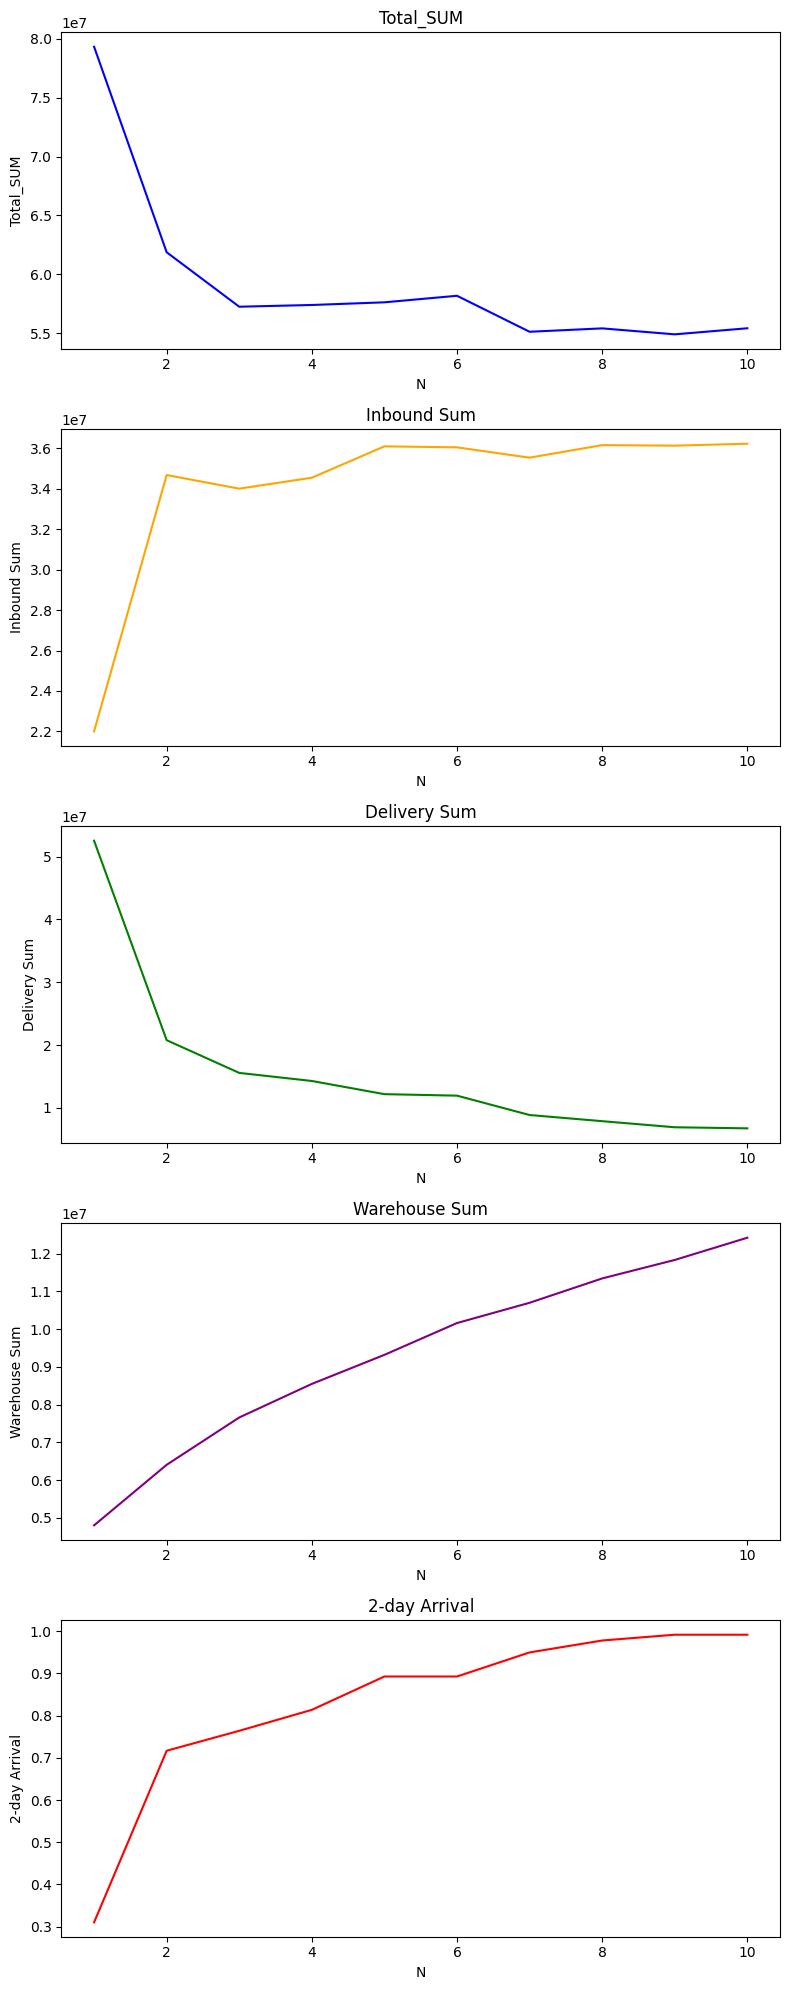

In [22]:
fig, axes = plt.subplots(5, 1, figsize=(8, 20))

df = results.copy()

# Plot Total_SUM
axes[0].plot(df['N'], df['Total_SUM'], color='blue')
axes[0].set_title('Total_SUM')
axes[0].set_xlabel('N')
axes[0].set_ylabel('Total_SUM')

# Plot Inbound Sum
axes[1].plot(df['N'], df['Inbound Sum'], color='orange')
axes[1].set_title('Inbound Sum')
axes[1].set_xlabel('N')
axes[1].set_ylabel('Inbound Sum')

# Plot Delivery Sum
axes[2].plot(df['N'], df['Delivery Sum'], color='green')
axes[2].set_title('Delivery Sum')
axes[2].set_xlabel('N')
axes[2].set_ylabel('Delivery Sum')

# Plot Warehouse Sum
axes[3].plot(df['N'], df['Warehouse Sum'], color='purple')
axes[3].set_title('Warehouse Sum')
axes[3].set_xlabel('N')
axes[3].set_ylabel('Warehouse Sum')

# Plot 2-day Arrival
axes[4].plot(df['N'], df['2일 이내 도착'], color='red')
axes[4].set_title('2-day Arrival')
axes[4].set_xlabel('N')
axes[4].set_ylabel('2-day Arrival')

fig.tight_layout()
plt.show()

### 모든 그래프 추이 동시 제시

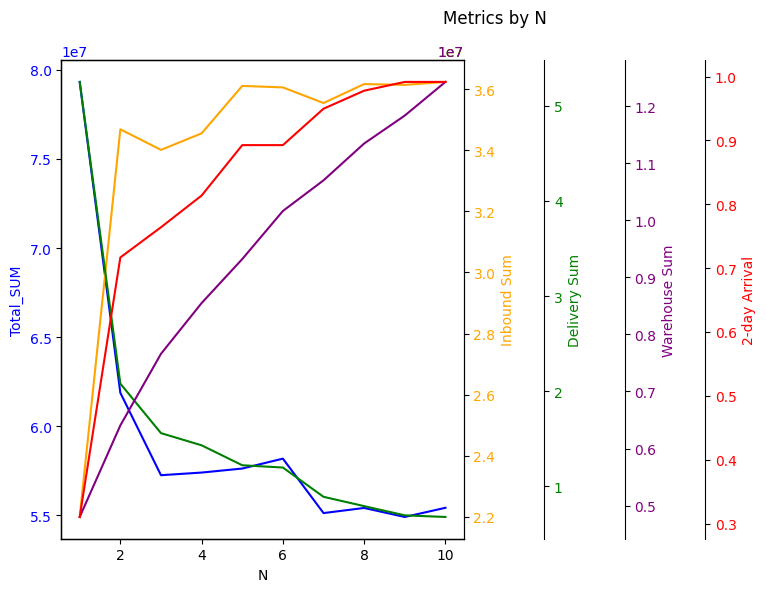

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))

df = results.copy()

# Plot Total_SUM with primary y-axis
ax1.plot(df['N'], df['Total_SUM'], color='blue', label='Total_SUM')
ax1.set_xlabel('N')
ax1.set_ylabel('Total_SUM', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Inbound Sum on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['N'], df['Inbound Sum'], color='orange', label='Inbound Sum')
ax2.set_ylabel('Inbound Sum', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Plot Delivery Sum on tertiary y-axis
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
ax3.plot(df['N'], df['Delivery Sum'], color='green', label='Delivery Sum')
ax3.set_ylabel('Delivery Sum', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Plot Warehouse Sum on quaternary y-axis
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("axes", 1.4))
ax4.plot(df['N'], df['Warehouse Sum'], color='purple', label='Warehouse Sum')
ax4.set_ylabel('Warehouse Sum', color='purple')
ax4.tick_params(axis='y', labelcolor='purple')

# Plot 2-day Arrival on quinary y-axis
ax5 = ax1.twinx()
ax5.spines["right"].set_position(("axes", 1.6))
ax5.plot(df['N'], df['2일 이내 도착'], color='red', label='2-day Arrival')
ax5.set_ylabel('2-day Arrival', color='red')
ax5.tick_params(axis='y', labelcolor='red')

# Legends and Title
fig.suptitle('Metrics by N')
fig.tight_layout()
plt.show()

추가적인 진행방향

### 창고를 병합하는 경우 고려

priority 테이블에서 1개, 2개, 3개씩 줄여가며 확인해보겠습니다. priority는 우선순위만 고려하므로, 그 우선순위가 물류비에 기여하는지에 대한 진실은 확인할 수 없습니다. 

In [24]:
import itertools
import math
import pandas as pd
import random

# priority 테이블에서 도시를 무작위로 섞기
shuffled_cities = random.sample(priority['City&State'].tolist(), len(priority))

# 리스트 초기화
results_list = []

# 1부터 10까지 반복
for n in range(1, 11):
    # n개 도시 조합 생성 (무작위로 섞은 도시들로)
    city_combinations = itertools.combinations(shuffled_cities, n)
    
    # 최소 물류비를 가진 조합을 찾기 위한 변수
    min_total_cost = float('inf')  # 초기값으로 매우 큰 값 설정
    best_combination = None
    
    # 각 조합에 대해 반복
    for selected_cities in city_combinations:
        # filtered_table 생성
        filtered_table = total_table[total_table['From City&State'].isin(selected_cities)]
        
        # 각 'To City&State'마다 'TOTAL'이 최소인 Row 선택
        min_total_rows = (
            filtered_table
            .sort_values(by='TOTAL')
            .drop_duplicates(subset='To City&State', keep='first')
        )
        
        # 1. 'Warehouse' 비용 합산
        total_warehouse_cost = sum(min_total_rows['Warehouse'])

        # 2. 창고 개수(n)의 제곱근 계산
        sqrt_user_input = math.sqrt(n)

        # 3. 원래 Warehouse 비용에 제곱근을 곱해 최종 비용 계산
        adjusted_warehouse_cost = total_warehouse_cost * sqrt_user_input
        
        # 'TOTAL'의 총합 계산
        inbound_sum = min_total_rows['Inbound'].sum()
        delivery_sum = min_total_rows['Delivery'].sum()
        total_sum = inbound_sum + delivery_sum + adjusted_warehouse_cost

        # 'Demand'의 총합 계산
        total_demand = min_total_rows['Demand'].sum()
        
        # TempD가 800 이하인 행 필터링
        tempd_below_800 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 800]

        # 'TempD'가 1600 이하인 행 필터링
        tempd_below_1600 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 1600]
        
        # Demand의 총합에서 TempD가 800 이하인 행의 Demand 총합
        total_demand_below_800 = tempd_below_800['Demand'].sum()
        
        # 'Demand'의 총합에서 'TempD'가 1600 이하인 행의 Demand 총합 계산
        total_demand_below_1600 = tempd_below_1600['Demand'].sum()
        
        # 1일 비율 계산
        ratio1 = total_demand_below_800 / total_demand if total_demand != 0 else 'Error!'

        # 2일 이내 비율 계산
        ratio = total_demand_below_1600 / total_demand if total_demand > 0 else 'Error!'

        # 총 물류비가 더 적은 경우 업데이트
        if total_sum < min_total_cost:
            min_total_cost = total_sum
            best_combination = selected_cities
    
    # 최종적으로 가장 적은 물류비를 가진 조합 저장
    results_list.append({
        'N': n,
        'Best Combination': best_combination,
        'Total_SUM': min_total_cost, 
        'Inbound Sum': inbound_sum,
        'Delivery Sum': delivery_sum,
        'Warehouse Sum': adjusted_warehouse_cost,
        '당일 도착': ratio1, 
        '2일 이내 도착': ratio
    })

# 결과를 DataFrame으로 변환
results = pd.DataFrame(results_list)
results

,N,Best Combination,Total_SUM,Inbound Sum,Delivery Sum,Warehouse Sum,당일 도착,2일 이내 도착
0,1,"(Houston, TX,)",6.917714e+07,5.000004e+07,4.269506e+07,4.201772e+06,0.216427,0.406346
1,2,"(Memphis, TN, Los Angeles, CA)",5.606970e+07,3.468317e+07,2.078614e+07,6.405105e+06,0.479955,0.716727
2,3,"(Houston, TX, Columbus, OH, Los Angeles, CA)",5.284945e+07,3.744894e+07,1.331007e+07,7.070228e+06,0.579778,0.870954
3,4,"(Houston, TX, Columbus, OH, Portland, OR, Los ...",5.273006e+07,3.851632e+07,1.140962e+07,8.080976e+06,0.608983,0.932961
4,5,"(Houston, TX, Chicago, IL, Columbus, OH, Portl...",5.281453e+07,3.848985e+07,1.044026e+07,8.886970e+06,0.625902,0.946689
5,6,"(Houston, TX, Chicago, IL, Charlotte, NC, Colu...",5.315972e+07,3.820637e+07,9.816736e+06,9.608491e+06,0.672638,0.955709
6,7,"(Houston, TX, Chicago, IL, Charlotte, NC, Colu...",5.347879e+07,3.815783e+07,9.577651e+06,1.032806e+07,0.687991,0.955709
7,8,"(Houston, TX, Chicago, IL, Memphis, TN, Charlo...",5.401158e+07,3.761020e+07,8.281636e+06,1.078843e+07,0.689576,0.985179
8,9,"(Houston, TX, Chicago, IL, Memphis, TN, Charlo...",5.459913e+07,3.712481e+07,7.898128e+06,1.175641e+07,0.730989,0.986459
9,10,"(Houston, TX, Chicago, IL, Memphis, TN, Charlo...",5.542076e+07,3.623379e+07,6.760961e+06,1.242601e+07,0.854473,0.991521


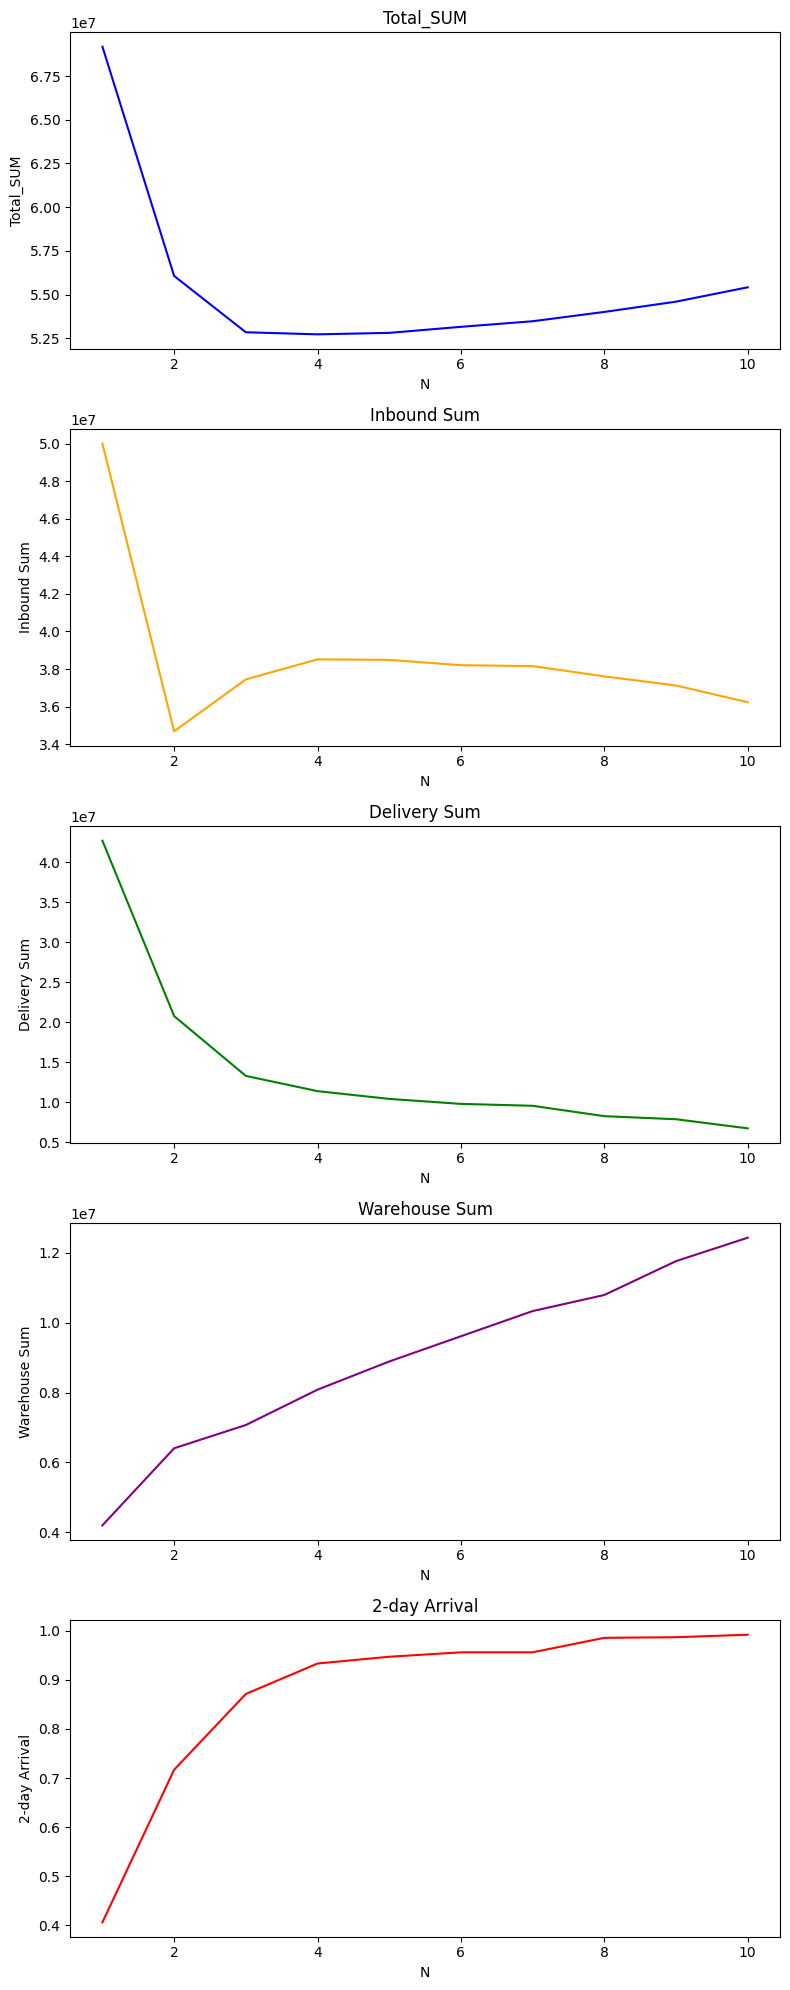

In [25]:
fig, axes = plt.subplots(5, 1, figsize=(8, 20))

df = results.copy()

# Plot Total_SUM
axes[0].plot(df['N'], df['Total_SUM'], color='blue')
axes[0].set_title('Total_SUM')
axes[0].set_xlabel('N')
axes[0].set_ylabel('Total_SUM')

# Plot Inbound Sum
axes[1].plot(df['N'], df['Inbound Sum'], color='orange')
axes[1].set_title('Inbound Sum')
axes[1].set_xlabel('N')
axes[1].set_ylabel('Inbound Sum')

# Plot Delivery Sum
axes[2].plot(df['N'], df['Delivery Sum'], color='green')
axes[2].set_title('Delivery Sum')
axes[2].set_xlabel('N')
axes[2].set_ylabel('Delivery Sum')

# Plot Warehouse Sum
axes[3].plot(df['N'], df['Warehouse Sum'], color='purple')
axes[3].set_title('Warehouse Sum')
axes[3].set_xlabel('N')
axes[3].set_ylabel('Warehouse Sum')

# Plot 2-day Arrival
axes[4].plot(df['N'], df['2일 이내 도착'], color='red')
axes[4].set_title('2-day Arrival')
axes[4].set_xlabel('N')
axes[4].set_ylabel('2-day Arrival')

fig.tight_layout()
plt.show()

Total_SUM이 제일 작지는 않은데, 다른 경우보다 작고, 대신 2 day arrival이 좀 더 큰 경우가 있겠음

In [26]:
import itertools
import math
import pandas as pd
import random

# priority 테이블에서 도시를 무작위로 섞기
shuffled_cities = random.sample(priority['City&State'].tolist(), len(priority))

# 리스트 초기화
results_list = []

# 가중치 설정 (물류비와 2일 이내 도착 비율의 중요도를 고려)
weight_warehouse = 0.7  # 물류비에 더 큰 가중치를 부여
weight_arrival_2days = 0.3  # 2일 이내 도착 비율에 더 작은 가중치를 부여

# 1부터 10까지 반복
for n in range(1, 11):
    # n개 도시 조합 생성 (무작위로 섞은 도시들로)
    city_combinations = itertools.combinations(shuffled_cities, n)
    
    # 최소 물류비와 최대 2일 이내 도착 비율을 가진 조합을 찾기 위한 변수
    min_total_cost = float('inf')  # 초기값으로 매우 큰 값 설정
    best_combination = None
    best_ratio = 0  # 2일 이내 도착 비율

    # 각 조합에 대해 반복
    for selected_cities in city_combinations:
        # filtered_table 생성
        filtered_table = total_table[total_table['From City&State'].isin(selected_cities)]
        
        # 각 'To City&State'마다 'TOTAL'이 최소인 Row 선택
        min_total_rows = (
            filtered_table
            .sort_values(by='TOTAL')
            .drop_duplicates(subset='To City&State', keep='first')
        )
        
        # 1. 'Warehouse' 비용 합산
        total_warehouse_cost = sum(min_total_rows['Warehouse'])

        # 2. 창고 개수(n)의 제곱근 계산
        sqrt_user_input = math.sqrt(n)

        # 3. 원래 Warehouse 비용에 제곱근을 곱해 최종 비용 계산
        adjusted_warehouse_cost = total_warehouse_cost * sqrt_user_input
        
        # 'TOTAL'의 총합 계산
        inbound_sum = min_total_rows['Inbound'].sum()
        delivery_sum = min_total_rows['Delivery'].sum()
        total_sum = inbound_sum + delivery_sum + adjusted_warehouse_cost

        # 'Demand'의 총합 계산
        total_demand = min_total_rows['Demand'].sum()
        
        # TempD가 800 이하인 행 필터링
        tempd_below_800 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 800]

        # 'TempD'가 1600 이하인 행 필터링
        tempd_below_1600 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 1600]
        
        # Demand의 총합에서 TempD가 800 이하인 행의 Demand 총합
        total_demand_below_800 = tempd_below_800['Demand'].sum()
        
        # 'Demand'의 총합에서 'TempD'가 1600 이하인 행의 Demand 총합 계산
        total_demand_below_1600 = tempd_below_1600['Demand'].sum()
        
        # 1일 비율 계산
        ratio1 = total_demand_below_800 / total_demand if total_demand != 0 else 0

        # 2일 이내 비율 계산
        ratio = total_demand_below_1600 / total_demand if total_demand > 0 else 0

        # 총 물류비와 2일 이내 도착 비율을 가중치를 적용한 점수로 결합
        weighted_score = weight_warehouse * total_sum + weight_arrival_2days * (1 - ratio)  # 비율이 높을수록 더 좋음

        # 최종 점수가 더 작은 경우 업데이트
        if weighted_score < min_total_cost:
            min_total_cost = weighted_score
            best_combination = selected_cities
            best_ratio = ratio
    
    # 최종적으로 가장 적은 물류비와 좋은 2일 이내 도착 비율을 가진 조합 저장
    results_list.append({
        'N': n,
        'Best Combination': best_combination,
        'Total_SUM': min_total_cost, 
        'Inbound Sum': inbound_sum,
        'Delivery Sum': delivery_sum,
        'Warehouse Sum': adjusted_warehouse_cost,
        '당일 도착': ratio1, 
        '2일 이내 도착': best_ratio
    })

# 결과를 DataFrame으로 변환
results = pd.DataFrame(results_list)
results

,N,Best Combination,Total_SUM,Inbound Sum,Delivery Sum,Warehouse Sum,당일 도착,2일 이내 도착
0,1,"(Houston, TX,)",4.842400e+07,4.600004e+07,2.951986e+07,3.281060e+06,0.141907,0.275200
1,2,"(Memphis, TN, Los Angeles, CA)",3.924879e+07,4.667726e+07,2.805882e+07,4.860571e+06,0.291373,0.727674
2,3,"(Houston, TX, Columbus, OH, Los Angeles, CA)",3.699462e+07,4.343135e+07,2.718679e+07,6.621819e+06,0.388360,0.921336
3,4,"(Houston, TX, Columbus, OH, Portland, OR, Los ...",3.691104e+07,3.450089e+07,1.393600e+07,8.638237e+06,0.651887,0.936267
4,5,"(Houston, TX, Columbus, OH, Portland, OR, Los ...",3.697017e+07,3.677387e+07,1.102051e+07,9.365416e+06,0.681093,0.936267
5,6,"(Houston, TX, Columbus, OH, Portland, OR, Los ...",3.721181e+07,3.700969e+07,9.163312e+06,9.887290e+06,0.714823,0.964495
6,7,"(Houston, TX, Columbus, OH, Portland, OR, Denv...",3.743515e+07,3.705349e+07,9.039368e+06,1.069259e+07,0.724892,0.991521
7,8,"(Houston, TX, Columbus, OH, Portland, OR, Memp...",3.780811e+07,3.702702e+07,8.070009e+06,1.124386e+07,0.741811,0.991521
8,9,"(Houston, TX, Columbus, OH, Portland, OR, Atla...",3.821939e+07,3.712481e+07,7.898128e+06,1.175641e+07,0.730989,0.991521
9,10,"(Houston, TX, Columbus, OH, Portland, OR, Atla...",3.879453e+07,3.623379e+07,6.760961e+06,1.242601e+07,0.854473,0.991521


In [27]:
print(results['Best Combination'][6])

('Houston, TX', 'Columbus, OH', 'Portland, OR', 'Denver, CO', 'Los Angeles, CA', 'Chicago, IL', 'Charlotte, NC')


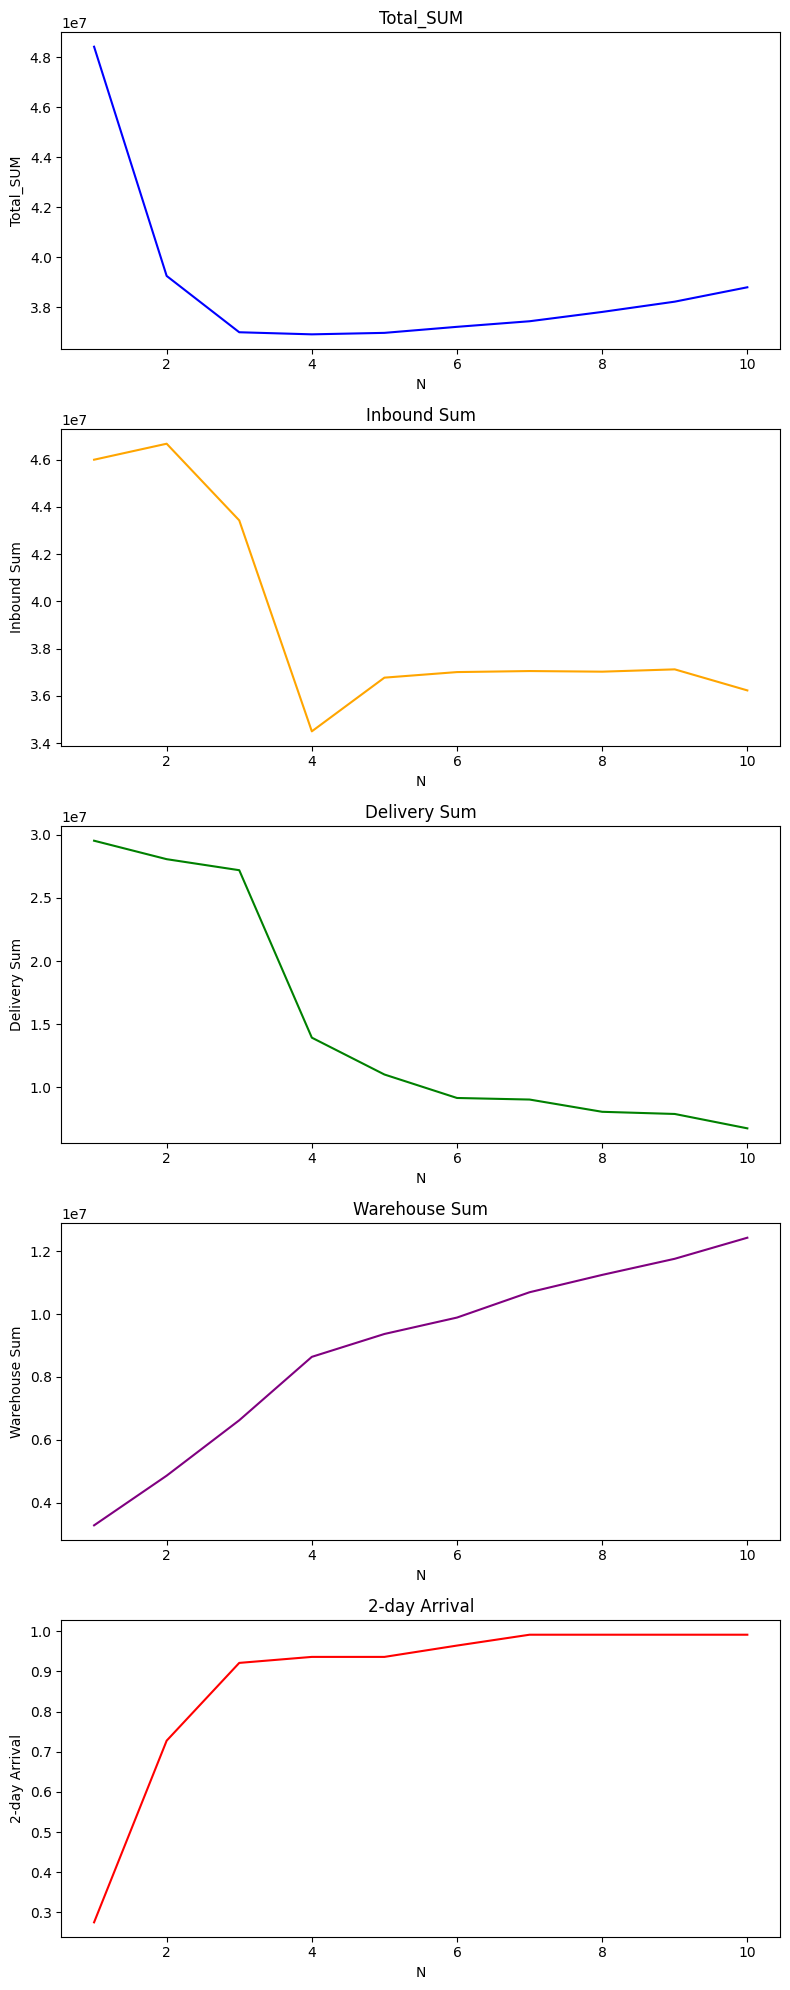

In [28]:
fig, axes = plt.subplots(5, 1, figsize=(8, 20))

df = results.copy()

# Plot Total_SUM
axes[0].plot(df['N'], df['Total_SUM'], color='blue')
axes[0].set_title('Total_SUM')
axes[0].set_xlabel('N')
axes[0].set_ylabel('Total_SUM')

# Plot Inbound Sum
axes[1].plot(df['N'], df['Inbound Sum'], color='orange')
axes[1].set_title('Inbound Sum')
axes[1].set_xlabel('N')
axes[1].set_ylabel('Inbound Sum')

# Plot Delivery Sum
axes[2].plot(df['N'], df['Delivery Sum'], color='green')
axes[2].set_title('Delivery Sum')
axes[2].set_xlabel('N')
axes[2].set_ylabel('Delivery Sum')

# Plot Warehouse Sum
axes[3].plot(df['N'], df['Warehouse Sum'], color='purple')
axes[3].set_title('Warehouse Sum')
axes[3].set_xlabel('N')
axes[3].set_ylabel('Warehouse Sum')

# Plot 2-day Arrival
axes[4].plot(df['N'], df['2일 이내 도착'], color='red')
axes[4].set_title('2-day Arrival')
axes[4].set_xlabel('N')
axes[4].set_ylabel('2-day Arrival')

fig.tight_layout()
plt.show()

In [29]:
# 조건을 만족하는 결과 필터링
filtered_results = [result for result in results_list if result['2일 이내 도착'] > 0.95]

# Total_SUM이 가장 작은 결과 찾기
if filtered_results:
    min_total_sum_result = min(filtered_results, key=lambda x: x['Total_SUM'])
    print("조건을 만족하는 결과 중 Total_SUM이 가장 작은 경우:")
    print(min_total_sum_result)
else:
    print("조건을 만족하는 결과가 없습니다.")

조건을 만족하는 결과 중 Total_SUM이 가장 작은 경우:
{'N': 6, 'Best Combination': ('Houston, TX', 'Columbus, OH', 'Portland, OR', 'Los Angeles, CA', 'Chicago, IL', 'Charlotte, NC'), 'Total_SUM': 37211805.651991785, 'Inbound Sum': 37009688.86363636, 'Delivery Sum': 9163311.752196766, 'Warehouse Sum': 9887290.290680174, '당일 도착': 0.7148228404818314, '2일 이내 도착': 0.9644952555151377}


# 제곱근 법칙 고려 안하는 경우

In [30]:
#리스트 초기화
results_list = []

# 1부터 10까지 반복
for n in range(1, 11):
    # n개 도시 선택
    selected_cities = priority.head(n)['City&State']
    
    # filtered_table 생성
    filtered_table = total_table[total_table['From City&State'].isin(selected_cities)]
    
    # 각 'To City&State'마다 'TOTAL'이 최소인 Row 선택
    min_total_rows = []
    min_total_rows = filtered_table.loc[filtered_table.groupby('To City&State')['TOTAL'].idxmin()]
    
    # 'TOTAL'의 총합 계산
    inbound_sum = min_total_rows['Inbound'].sum()
    delivery_sum = min_total_rows['Delivery'].sum()
    warehouse_sum = min_total_rows['Warehouse'].sum()

    total_sum = inbound_sum + delivery_sum + warehouse_sum

    # 'Demand'의 총합 계산
    total_demand = min_total_rows['Demand'].sum()
    
    #TempD가 800 이하인 행 필터링
    tempd_below_800 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 800]

    # 'TempD'가 1600 이하인 행 필터링
    tempd_below_1600 = min_total_rows[min_total_rows['TempD(직각거리)'] <= 1600]
    
    # Demand의 총합에서 TempD가 800 이하인 행의 Demand 총합
    total_demand_below_800 = tempd_below_800['Demand'].sum()
    
    # 'Demand'의 총합에서 'TempD'가 1600 이하인 행의 Demand 총합 계산
    total_demand_below_1600 = tempd_below_1600['Demand'].sum()
    
    # 1일 비율 계산
    ratio1 = total_demand_below_800 / total_demand if total_demand != 0 else 'Error!'

    # 비율 계산
    ratio = total_demand_below_1600 / total_demand if total_demand > 0 else 'Error!'
    
    # 결과 저장
    results_list.append({
        'N': n, 
        'Total_SUM': total_sum, 
        'Inbound Sum': inbound_sum,
        'Delivery Sum': delivery_sum,
        'Warehouse Sum': warehouse_sum,
        '당일 도착': ratio1, 
        '2일 이내 도착': ratio
    })

# 결과를 DataFrame으로 변환
results = pd.DataFrame(results_list)
results

,N,Total_SUM,Inbound Sum,Delivery Sum,Warehouse Sum,당일 도착,2일 이내 도착
0,1,7.932408e+07,2.200002e+07,5.252393e+07,4.800133e+06,0.263527,0.310381
1,2,5.999840e+07,3.468317e+07,2.078614e+07,4.529093e+06,0.479955,0.716727
2,3,5.401274e+07,3.401004e+07,1.558020e+07,4.422498e+06,0.592455,0.763960
3,4,5.312303e+07,3.455088e+07,1.429722e+07,4.274929e+06,0.599789,0.813646
4,5,5.247166e+07,3.610308e+07,1.220029e+07,4.168292e+06,0.642306,0.892570
5,6,5.216503e+07,3.605454e+07,1.196121e+07,4.149280e+06,0.657659,0.892570
6,7,4.846785e+07,3.554281e+07,8.880457e+06,4.044591e+06,0.803270,0.949565
7,8,4.807637e+07,3.616384e+07,7.900890e+06,4.011636e+06,0.830296,0.977794
8,9,4.701443e+07,3.613738e+07,6.931531e+06,3.945522e+06,0.847215,0.991521
9,10,4.692420e+07,3.623379e+07,6.760961e+06,3.929449e+06,0.854473,0.991521


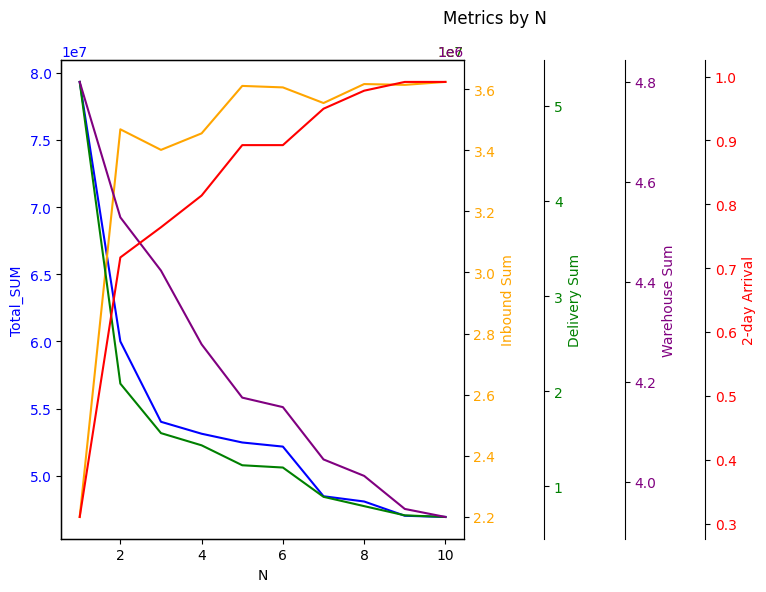

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))

df = results.copy()

# Plot Total_SUM with primary y-axis
ax1.plot(df['N'], df['Total_SUM'], color='blue', label='Total_SUM')
ax1.set_xlabel('N')
ax1.set_ylabel('Total_SUM', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Inbound Sum on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['N'], df['Inbound Sum'], color='orange', label='Inbound Sum')
ax2.set_ylabel('Inbound Sum', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Plot Delivery Sum on tertiary y-axis
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
ax3.plot(df['N'], df['Delivery Sum'], color='green', label='Delivery Sum')
ax3.set_ylabel('Delivery Sum', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Plot Warehouse Sum on quaternary y-axis
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("axes", 1.4))
ax4.plot(df['N'], df['Warehouse Sum'], color='purple', label='Warehouse Sum')
ax4.set_ylabel('Warehouse Sum', color='purple')
ax4.tick_params(axis='y', labelcolor='purple')

# Plot 2-day Arrival on quinary y-axis
ax5 = ax1.twinx()
ax5.spines["right"].set_position(("axes", 1.6))
ax5.plot(df['N'], df['2일 이내 도착'], color='red', label='2-day Arrival')
ax5.set_ylabel('2-day Arrival', color='red')
ax5.tick_params(axis='y', labelcolor='red')

# Legends and Title
fig.suptitle('Metrics by N')
fig.tight_layout()
plt.show()

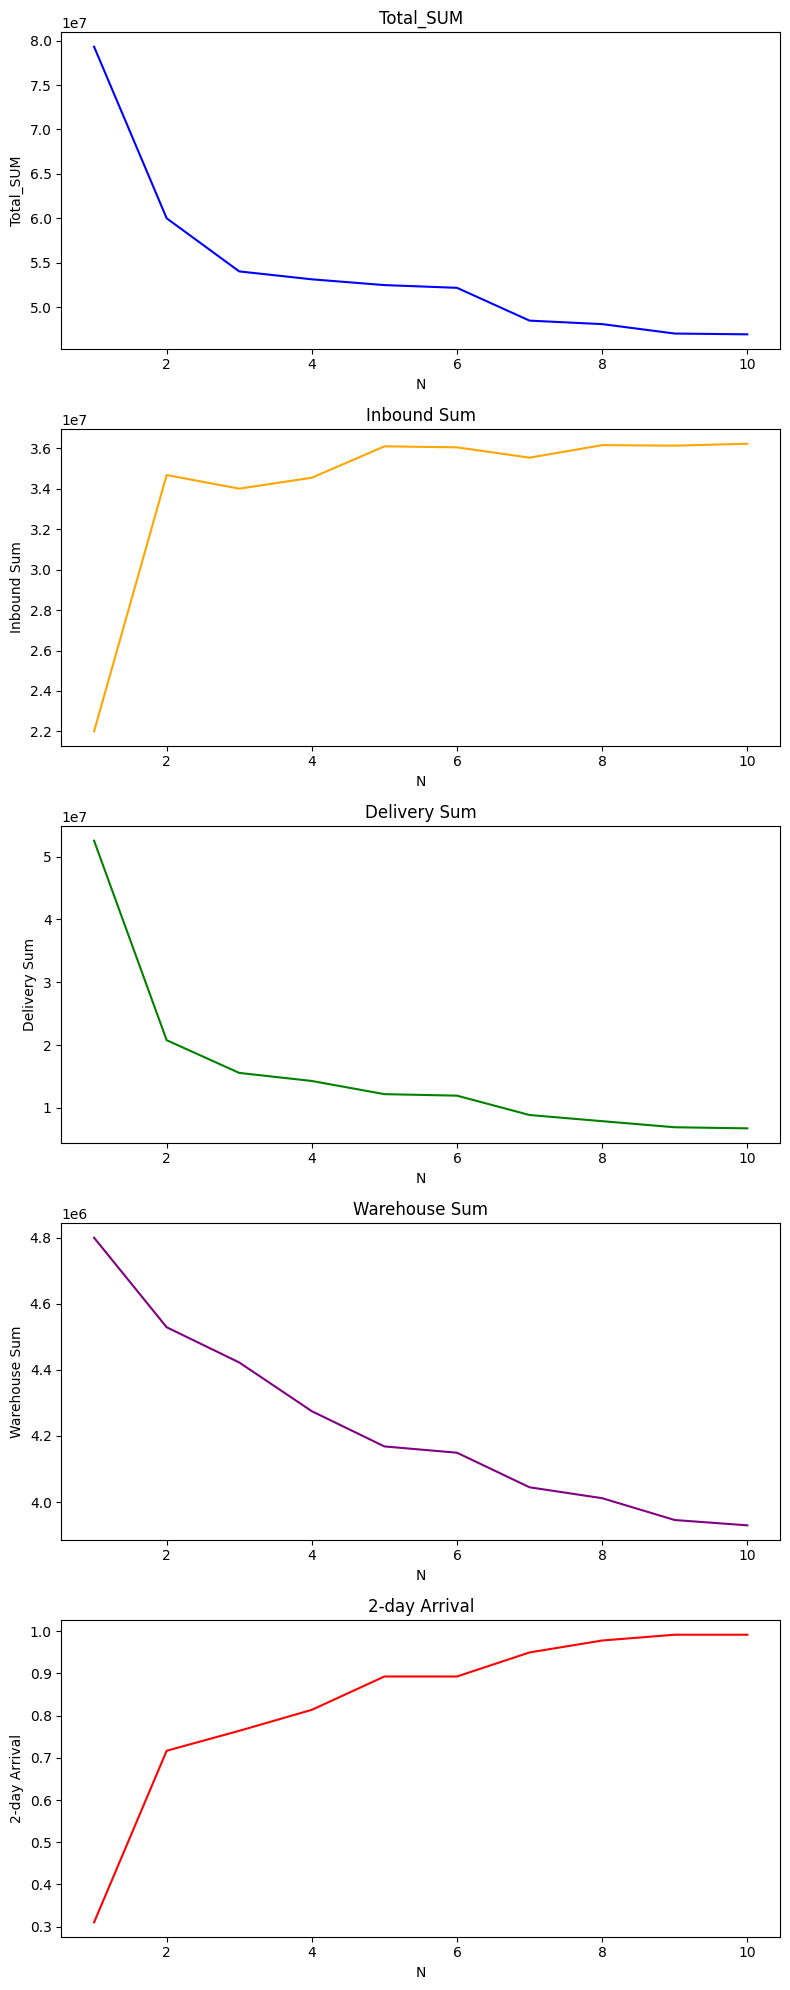

In [32]:
fig, axes = plt.subplots(5, 1, figsize=(8, 20))

df = results.copy()

# Plot Total_SUM
axes[0].plot(df['N'], df['Total_SUM'], color='blue')
axes[0].set_title('Total_SUM')
axes[0].set_xlabel('N')
axes[0].set_ylabel('Total_SUM')

# Plot Inbound Sum
axes[1].plot(df['N'], df['Inbound Sum'], color='orange')
axes[1].set_title('Inbound Sum')
axes[1].set_xlabel('N')
axes[1].set_ylabel('Inbound Sum')

# Plot Delivery Sum
axes[2].plot(df['N'], df['Delivery Sum'], color='green')
axes[2].set_title('Delivery Sum')
axes[2].set_xlabel('N')
axes[2].set_ylabel('Delivery Sum')

# Plot Warehouse Sum
axes[3].plot(df['N'], df['Warehouse Sum'], color='purple')
axes[3].set_title('Warehouse Sum')
axes[3].set_xlabel('N')
axes[3].set_ylabel('Warehouse Sum')

# Plot 2-day Arrival
axes[4].plot(df['N'], df['2일 이내 도착'], color='red')
axes[4].set_title('2-day Arrival')
axes[4].set_xlabel('N')
axes[4].set_ylabel('2-day Arrival')

fig.tight_layout()
plt.show()

## 안전재고 고려

In [34]:
# Z 값 설정
Z = 1.64

# 리드타임 계산 (거리/800)
min_total_rows['리드타임'] = min_total_rows['TempD(직각거리)'] / 800

# 안전재고 계산
min_total_rows['안전재고'] = Z * min_total_rows['평균재고량'] * min_total_rows['리드타임']

# 각 From City&State에 대해 최종 안전재고 계산
final_safety_stock = min_total_rows.groupby('From City&State')['안전재고'].sum().reset_index()

# 열 이름 변경
final_safety_stock.rename(columns={'안전재고': '최종 안전재고'}, inplace=True)

# 결과 출력
print(final_safety_stock)

   From City&State        최종 안전재고
0      Atlanta, GA   14920.111672
1    Baltimore, MD   76279.930061
2    Charlotte, NC   69170.871246
3      Chicago, IL   41210.487669
4     Columbus, OH   65235.340440
5       Denver, CO    1832.497518
6      Houston, TX  143365.552237
7  Los Angeles, CA  137237.391865
8      Memphis, TN   13586.871345
9     Portland, OR  135254.332529


In [139]:
# Z 값 설정
Z = 1.64

# 리드타임 계산 (거리/800)
min_total_rows['리드타임'] = min_total_rows['TempD(직각거리)'] / 800

# 창고별 총 수요량 계산
# From City&State에 있는 각 창고가 수용해야 하는 총 수요량을 합산하여 계산
total_demand_per_warehouse = min_total_rows.groupby('From City&State')['월평균재고량'].sum().reset_index()
total_demand_per_warehouse.rename(columns={'월평균재고량': '총 수요량'}, inplace=True)

# 각 창고의 총 수요량을 원래 데이터프레임에 합침
min_total_rows = min_total_rows.merge(total_demand_per_warehouse, on='From City&State')

# 최종 안전재고 계산: 창고별 총 수요량을 기준으로 안전재고 설정
# 수요가 일정하다고 가정하므로 총 수요량과 리드타임을 곱해 창고 단위의 안전재고 계산
min_total_rows['안전재고'] = Z * min_total_rows['총 수요량'] * min_total_rows['리드타임']

# 각 From City&State에 대해 최종 안전재고를 한 번만 남기도록 drop_duplicates로 중복 제거
final_safety_stock = min_total_rows[['From City&State', '안전재고']].drop_duplicates().reset_index(drop=True)

# 열 이름 변경
final_safety_stock.rename(columns={'안전재고': '최종 안전재고'}, inplace=True)

# 결과 출력
print(final_safety_stock)

     From City&State       최종 안전재고
0        Houston, TX  16650.118255
1       Columbus, OH   1631.250068
2    Los Angeles, CA  43670.368398
3      Baltimore, MD   1876.820621
4      Baltimore, MD   4746.983744
..               ...           ...
292    Charlotte, NC   4358.953806
293    Charlotte, NC   1499.284618
294    Baltimore, MD   7279.340236
295     Columbus, OH   9054.957496
296    Baltimore, MD   8884.944672

[297 rows x 2 columns]
